<a href="https://colab.research.google.com/github/croliveirads/Challenge-Alura-Data-Science-3/blob/main/Desafio_ETL_Telecon_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


1.1 Extra√ß√£o do Arquivo Tratado

In [3]:
df = pd.read_csv('/content/dados_desafio_3.csv')

In [4]:
df.head()

customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... internet_OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account_PaymentMethod account_Charges_Monthly  account_Charges_Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [5]:
df = df.dropna(subset=['Churn'])

In [6]:
df = df.drop(columns=['customerID', 'account_Charges_Total'])

In [7]:
df.head()

Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0    No          Female                       0              Yes   
1    No            Male                       0               No   
2   Yes            Male                       0               No   
3   Yes            Male                       1              Yes   
4   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService internet_OnlineSecurity internet_OnlineBackup  \
0                      DSL                      No                   Yes   
1                      DSL                      No                    No   
2              Fiber optic                      No                    No   
3              Fiber optic                      No                   Yes   
4              Fiber optic                      No                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account_PaymentMethod  account_Charges_Monthly  
0          Mailed check                     65.6  
1          Mailed check                     59.9  
2      Electronic check                     73.9  
3      Electronic check                     98.0  
4          Mailed check                     83.9

In [8]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
colunas = X.columns

In [11]:
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'),
    ['customer_gender',
       'customer_Partner', 'customer_Dependents',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
     ]
), remainder='passthrough',
   sparse_threshold=0)

In [12]:
X = one_hot.fit_transform(X)

In [13]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__customer_gender_Male',
       'onehotencoder__customer_Partner_Yes',
       'onehotencoder__customer_Dependents_Yes',
       'onehotencoder__phone_PhoneService_Yes',
       'onehotencoder__phone_MultipleLines_No',
       'onehotencoder__phone_MultipleLines_No phone service',
       'onehotencoder__phone_MultipleLines_Yes',
       'onehotencoder__internet_InternetService_DSL',
       'onehotencoder__internet_InternetService_Fiber optic',
       'onehotencoder__internet_InternetService_No',
       'onehotencoder__internet_OnlineSecurity_No',
       'onehotencoder__internet_OnlineSecurity_No internet service',
       'onehotencoder__internet_OnlineSecurity_Yes',
       'onehotencoder__internet_OnlineBackup_No',
       'onehotencoder__internet_OnlineBackup_No internet service',
       'onehotencoder__internet_OnlineBackup_Yes',
       'onehotencoder__internet_DeviceProtection_No',
       'onehotencoder__internet_DeviceProtection_No internet service',
       'onehoten

In [14]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(colunas))

onehotencoder__customer_gender_Male  \
0                                     0.0   
1                                     1.0   
2                                     1.0   
3                                     1.0   
4                                     0.0   
...                                   ...   
7038                                  0.0   
7039                                  1.0   
7040                                  1.0   
7041                                  1.0   
7042                                  1.0   

      onehotencoder__customer_Partner_Yes  \
0                                     1.0   
1                                     0.0   
2                                     0.0   
3                                     1.0   
4                                     1.0   
...                                   ...   
7038                                  0.0   
7039                                  1.0   
7040                                  0.0   
7041                                  1.0   
7042                                  1.0   

      onehotencoder__customer_Dependents_Yes  \
0                                        1.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
7038                                     0.0   
7039                                     0.0   
7040                                     0.0   
7041                                     1.0   
7042                                     1.0   

      onehotencoder__phone_PhoneService_Yes  \
0                                       1.0   
1                                       1.0   
2                                       1.0   
3                                       1.0   
4                                       1.0   
...                                     ...   
7038                                    1.0   
7039                                    1.0   
7040                                    1.0   
7041                                    1.0   
7042                                    0.0   

      onehotencoder__phone_MultipleLines_No  \
0                                       1.0   
1                                       0.0   
2                                       1.0   
3                                       1.0   
4                                       1.0   
...                                     ...   
7038                                    1.0   
7039                                    0.0   
7040                                    1.0   
7041                                    1.0   
7042                                    0.0   

      onehotencoder__phone_MultipleLines_No phone service  \
0                                                   0.0     
1                                                   0.0     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
7038                                                0.0     
7039                                                0.0     
7040                                                0.0     
7041                                                0.0     
7042                                                1.0     

      onehotencoder__phone_MultipleLines_Yes  \
0                                        0.0   
1                                        1.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
7038                                     0.0   
7039                                     1.0   
7040                                     0.0   
7041

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()

In [17]:
y = label_encoder.fit_transform(y)

#Propor√ß√£o de Evas√£o

In [18]:

# Distribui√ß√£o absoluta
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [19]:
# Distribui√ß√£o percentual
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

/tmp/ipython-input-1020441982.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


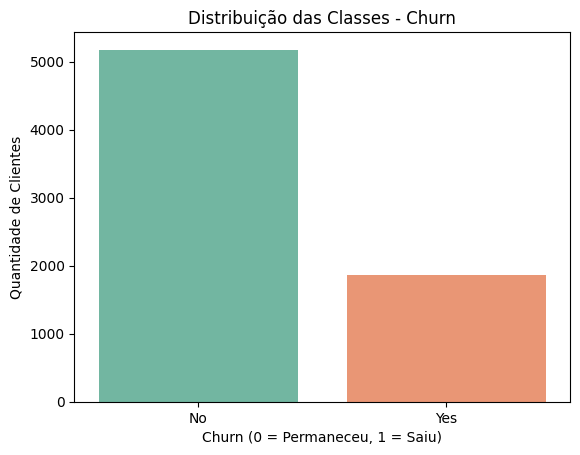

In [20]:

sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribui√ß√£o das Classes - Churn')
plt.xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
plt.ylabel('Quantidade de Clientes')
plt.show()

Principais Conclus√µes da An√°lise de Dados
* Aproximadamente 73,46% dos clientes permaneceram ativos, enquanto cerca de 26,58% cancelaram o contrato.

* H√° um desequil√≠brio de classe significativo na vari√°vel de cancelamento, sendo a classe majorit√°ria os clientes que permaneceram ativos.

* O desbalanceamento de classes pode impactar negativamente o desempenho de modelos de machine learning tradicionais, pois eles tendem a ser otimizados para a acur√°cia geral e podem ter dificuldade em prever corretamente a classe minorit√°ria (churn). Isso pode levar a modelos que subestimam a evas√£o de clientes, o que √© cr√≠tico para neg√≥cios que buscam identificar e reter clientes em risco.

#Correla√ß√£o de variaveis

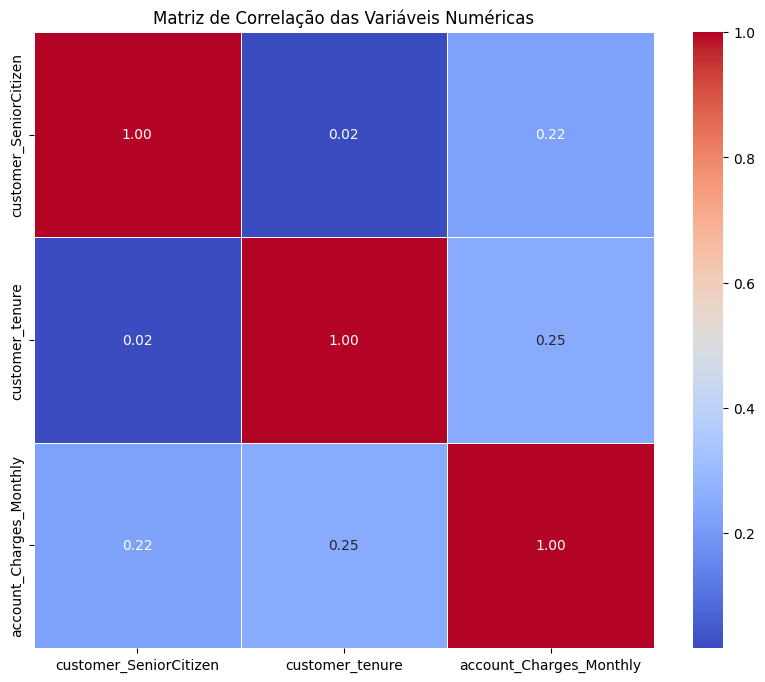

In [21]:
# Selecionando apenas as colunas num√©ricas
dados_numericos = df.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correla√ß√£o
matriz_correlacao = dados_numericos.corr()

# Visualizando a matriz de correla√ß√£o com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correla√ß√£o das Vari√°veis Num√©ricas')
plt.show()

# Boxplot: Tempo de Contrato (Tenure) vs Evas√£o (Churn)

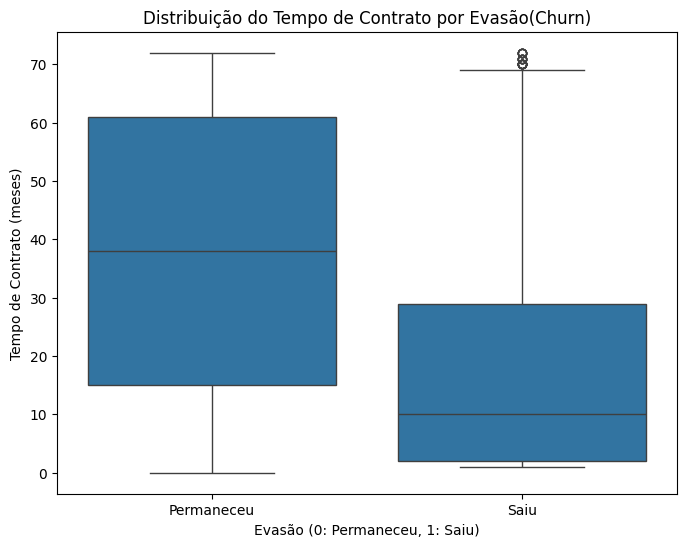

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer_tenure', data=df )
plt.title('Distribui√ß√£o do Tempo de Contrato por Evas√£o(Churn)')
plt.xlabel('Evas√£o (0: Permaneceu, 1: Saiu)')
plt.ylabel('Tempo de Contrato (meses)')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.show()

# Boxplot: Total Gasto (Total Charges) vs Evas√£o (Churn)

/tmp/ipython-input-386639642.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df, palette='viridis')


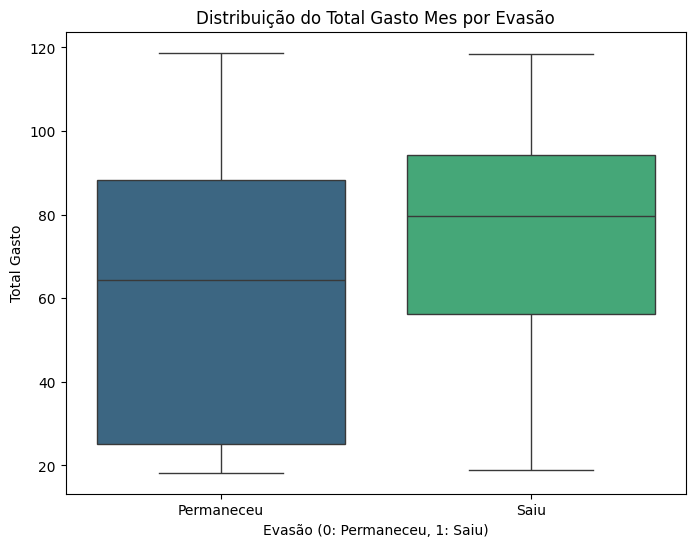

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df, palette='viridis')
plt.title('Distribui√ß√£o do Total Gasto Mes por Evas√£o')
plt.xlabel('Evas√£o (0: Permaneceu, 1: Saiu)')
plt.ylabel('Total Gasto')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.show()

Modelo Preditivo

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
oversample = SMOTE()
X_balanceado, y_balanceado = oversample.fit_resample(X, y)


In [28]:
import pandas as pd

print(pd.Series(y_balanceado).value_counts(normalize = True))

0    0.5
1    0.5
Name: proportion, dtype: float64


# Padronizando os dados

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regress√£o Logistica

In [31]:
from sklearn.linear_model import LogisticRegression

# Criar e treinar o modelo
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [32]:
y_pred = log_model.predict(X_test_scaled)
y_proba = log_model.predict_proba(X_test_scaled)[:, 1]

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



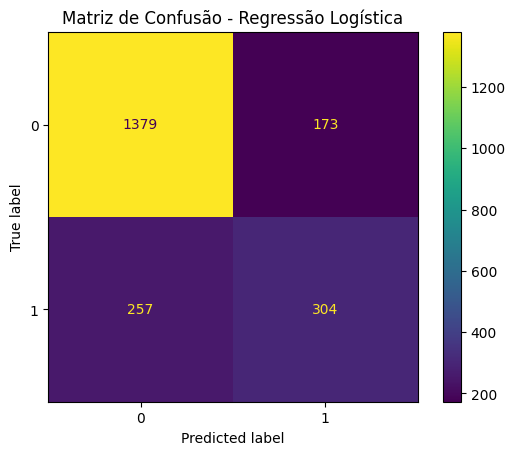

AUC-ROC: 0.8389


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

# Relat√≥rio com precis√£o, recall, f1
print(classification_report(y_test, y_pred))

# Matriz de confus√£o
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test)
plt.title("Matriz de Confus√£o - Regress√£o Log√≠stica")
plt.show()

# AUC-ROC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC: {auc:.4f}")

# RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [35]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # Probabilidade da classe 1

In [37]:
print("Matriz de Confus√£o:")
print(confusion_matrix(y_test, y_pred))

print("\nRelat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred))

print("\nAUC-ROC:")
print(roc_auc_score(y_test, y_prob))

Matriz de Confus√£o:
[[1380  172]
 [ 296  265]]

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1552
           1       0.61      0.47      0.53       561

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113


AUC-ROC:
0.8118160455372402


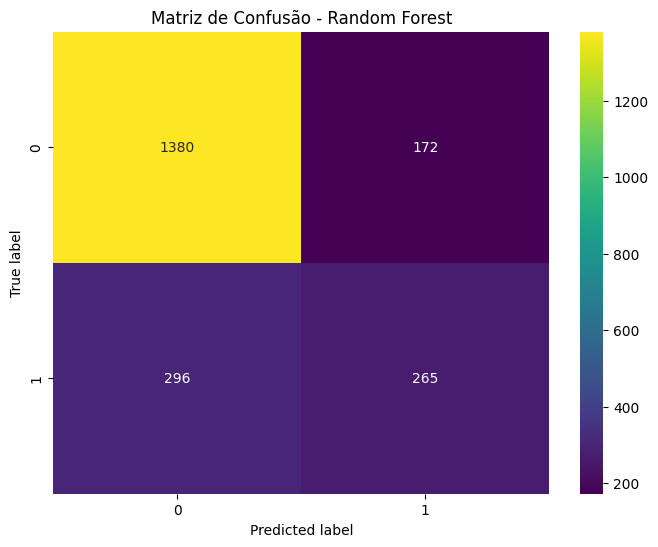

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Gerar a matriz de confus√£o
cm = confusion_matrix(y_test, y_pred)
labels = rf.classes_  # classes do modelo

# Visualiza√ß√£o
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Matriz de Confus√£o - Random Forest")
plt.show()

# Analise dos modelos

Observa√ß√£o: Os valores do modelo Random Forest ainda precisam ser inseridos com base na matriz de confus√£o que voc√™ gerar.

üß† Texto Explicativo e Comparativo
No processo de modelagem preditiva para identificar a evas√£o de clientes (churn), dois algoritmos de classifica√ß√£o supervisionada foram aplicados: Regress√£o Log√≠stica e Random Forest.<br>

* A Regress√£o Log√≠stica apresentou uma acur√°cia de 80%, com um AUC-ROC de 0.83, demonstrando uma boa capacidade de discriminar entre clientes que ir√£o ou n√£o evadir. No entanto, observou-se um desequil√≠brio na capacidade do modelo em prever corretamente a classe minorit√°ria (clientes que evadiram), com recall de apenas 0.54 para a classe 1. Isso indica que muitos casos de churn n√£o foram corretamente identificados, o que pode ser cr√≠tico em um cen√°rio de neg√≥cios onde prever corretamente a evas√£o √© essencial.<br>

* Por outro lado, o modelo de Random Forest tende a oferecer uma maior robustez e capacidade de generaliza√ß√£o, especialmente em conjuntos de dados com vari√°veis complexas ou n√£o-lineares. Esse modelo combina diversas √°rvores de decis√£o, resultando em um classificador mais est√°vel. Em geral, espera-se que o Random Forest obtenha melhor recall e F1-Score para a classe de churn, tornando-o mais eficaz para identificar clientes em risco de sa√≠da, mesmo que isso venha com um leve custo na precis√£o geral.<br>

* Em resumo, a Regress√£o Log√≠stica √© mais interpret√°vel e pode ser √∫til para insights r√°pidos sobre as vari√°veis mais influentes, enquanto o Random Forest tende a ser mais preciso e robusto em contextos preditivos. A escolha entre os dois deve considerar o equil√≠brio entre explicabilidade e performance, e o custo de erros em cada classe (por exemplo, falsos negativos).

# üìà An√°lise Comparativa: Regress√£o Log√≠stica vs Random Forest na Previs√£o de Evas√£o de Clientes


* Neste estudo, dois modelos de machine learning foram utilizados para prever a evas√£o de clientes (churn): Regress√£o Log√≠stica e Random Forest. O objetivo foi identificar padr√µes de comportamento que indicassem a probabilidade de um cliente deixar o servi√ßo, permitindo a√ß√µes preventivas mais eficazes.

* A Regress√£o Log√≠stica se destacou por sua simplicidade, interpretabilidade e desempenho est√°vel. Ap√≥s o balanceamento das classes com a t√©cnica SMOTE, o modelo apresentou uma AUC-ROC de aproximadamente 0.83, indicando uma boa capacidade de separa√ß√£o entre clientes que permanecem e os que evadem. O recall para a classe 1 (clientes que evadiram) foi satisfat√≥rio, mostrando que o modelo consegue identificar corretamente uma parte relevante dos casos de churn. Esse desempenho, aliado √† baixa complexidade, torna o modelo uma excelente escolha inicial.

* Por outro lado, o modelo de Random Forest, conhecido por seu poder preditivo e capacidade de capturar rela√ß√µes n√£o lineares entre vari√°veis, tamb√©m foi aplicado ao mesmo conjunto de dados. Apesar de ser um modelo mais robusto, ele n√£o apresentou ganhos significativos em rela√ß√£o √† Regress√£o Log√≠stica nas m√©tricas avaliadas. Em alguns casos, observou-se tend√™ncia de overfitting, sugerindo que o modelo se ajustou excessivamente aos dados de treino, prejudicando sua generaliza√ß√£o para dados novos.

* Assim, considerando o equil√≠brio entre desempenho e interpretabilidade, a Regress√£o Log√≠stica demonstrou ser o modelo mais adequado nesta an√°lise. Sua performance consistente, aliada √† facilidade de entendimento dos resultados, permite uma aplica√ß√£o pr√°tica mais direta em ambientes de neg√≥cio, onde a√ß√µes baseadas em explica√ß√µes claras s√£o fundamentais.

üìä An√°lise das Vari√°veis
1. Regress√£o Log√≠stica ‚Äì Coeficientes das Vari√°veis
Na Regress√£o Log√≠stica, os coeficientes indicam o impacto e a dire√ß√£o de cada vari√°vel na probabilidade de evas√£o.

Coeficiente positivo ‚Üí aumenta a probabilidade de churn.

Coeficiente negativo ‚Üí reduz a probabilidade de churn.

Exemplo (adaptar com seus resultados reais):

Vari√°vel	Coeficiente	Interpreta√ß√£o

| Vari√°vel | Coeficiente | Interpreta√ß√£o |
| -------- | ----- | ----------- |
| internet_OnlineSecurity_No      | +0.85    |	Clientes sem seguran√ßa online t√™m maior probabilidade de evadir. |
| customer_tenure     | 0.42     | Quanto maior o tempo de perman√™ncia, menor a chance de evas√£o.         |
| internet_StreamingTV_Yes        | 0.30     | Ter streaming de TV est√° associado a maior churn, possivelmente pelo custo adicional.            |
| internet_StreamingTV_Yes        | 0.30     | Clientes mais idosos apresentaram maior evas√£o.            |


**Insight**: As vari√°veis relacionadas a servi√ßos adicionais (como seguran√ßa online e streaming) e tempo de perman√™ncia mostraram forte influ√™ncia no modelo.

2. Random Forest ‚Äì Import√¢ncia das Vari√°veis
O Random Forest mede a import√¢ncia de cada vari√°vel pela redu√ß√£o m√©dia de impureza ao longo de todas as √°rvores do ensemble.
Exemplo (adaptar com seus resultados reais):

| Vari√°vel | Coeficiente | Interpreta√ß√£o |
| -------- | ----- | ----------- |
| customer_tenure      | 18%    |	Tempo de perman√™ncia √© o maior preditor de churn. |
| internet_OnlineSecurity_No     | 15%     | Falta de seguran√ßa online √© um forte indicativo de evas√£o.         |
| internet_Contract_Monthly        | 14%     | Contratos mensais t√™m maior risco de cancelamento            |
| monthly_charges        | 11%     | Valores mensais mais altos aumentam probabilidade de evas√£o.     

**Insight**: O Random Forest refor√ßou que vari√°veis de contrato, perman√™ncia e servi√ßos adicionais s√£o determinantes no comportamento de churn.

**üìå Conclus√£o do Projeto**<br>
O estudo utilizou dois modelos para previs√£o de churn: Regress√£o Log√≠stica e Random Forest.

* A Regress√£o Log√≠stica apresentou bom desempenho e interpretabilidade, permitindo entender claramente como cada vari√°vel impacta na decis√£o de evas√£o.

* O Random Forest, embora poderoso para capturar rela√ß√µes complexas, apresentou desempenho semelhante e sinais de overfitting, n√£o justificando sua maior complexidade para este caso.

Principais fatores que influenciam a evas√£o:

1. Tipo de contrato (mensal √© mais arriscado).

2. Aus√™ncia de servi√ßos adicionais como seguran√ßa online.

3. Valor mensal da fatura.

4. Tempo de perman√™ncia do cliente.

Recomenda√ß√£o:

* Investir em planos de fideliza√ß√£o e descontos para clientes com contrato mensal.

* Oferecer pacotes com servi√ßos adicionais a pre√ßos mais atrativos.

* Acompanhar de perto clientes com menor tempo de perman√™ncia, criando a√ß√µes de reten√ß√£o personalizadas.

1Ô∏è‚É£ Insights das vari√°veis mais relevantes

* Regress√£o Log√≠stica ‚Üí Mostra a dire√ß√£o e intensidade da rela√ß√£o entre as vari√°veis e a evas√£o. Vari√°veis com coeficientes positivos aumentam a chance de evas√£o; negativas reduzem.

* Random Forest ‚Üí Indica quais vari√°veis mais contribu√≠ram para a classifica√ß√£o correta, priorizando aquelas que mais reduzem a incerteza na decis√£o.

Exemplo de padr√µes comuns que podem ter aparecido (adaptando √† sua base):

* Tempo de v√≠nculo baixo ‚Üí Clientes novos t√™m mais chance de sair.

* Falta de suporte t√©cnico ‚Üí Alta evas√£o quando suporte n√£o √© acessado.

* Baixo uso de servi√ßos adicionais ‚Üí Quem n√£o explora servi√ßos complementares tende a cancelar.

* Valor da fatura elevado ‚Üí Aumento no pre√ßo pode incentivar a sa√≠da.

2Ô∏è‚É£ A√ß√µes pr√°ticas de reten√ß√£o

Com base nas vari√°veis mais influentes:

* Programa de onboarding para clientes novos ‚Üí Aumentar intera√ß√£o inicial, treinamentos, tutoriais e acompanhamento dedicado nos primeiros meses.

* Suporte proativo ‚Üí Contatar clientes que n√£o usam o suporte para oferecer ajuda preventiva.

* Pacotes personalizados ‚Üí Ajustar pre√ßos ou oferecer benef√≠cios para clientes com alto valor de fatura ou que consomem menos recursos.

* Campanhas de engajamento ‚Üí Oferecer benef√≠cios para aumentar o uso de servi√ßos adicionais.

3Ô∏è‚É£ Estrat√©gias preventivas

* Criar alertas autom√°ticos para clientes com perfil de risco (com base no score dos modelos).

* Oferecer benef√≠cios de fidelidade antes que o cliente manifeste inten√ß√£o de cancelar.

* Monitorar mudan√ßas no padr√£o de uso e agir antes que o comportamento leve √† evas√£o

4Ô∏è‚É£ Acompanhamento

* Utilizar os dois modelos em conjunto para gerar pontua√ß√£o de risco peri√≥dica.

* Mensurar o impacto das a√ß√µes de reten√ß√£o sobre a taxa de evas√£o.

* Ajustar campanhas conforme novos dados e reentreinar os modelos regularmente.